In [115]:
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Clustering


## K-Means (Manual)

**Pasos:**
1. **Inicialización de Centroides:**
Se eligen aleatoriamente k centroides iniciales. Cada centroide representa el punto central de un clúster potencial.

1. **Asignación de Puntos a Clústeres:**
Para cada punto de datos en el conjunto, se calcula la distancia entre el punto y todos los centroides.
El punto se asigna al cluster cuyo centroide esté más cerca, generalmente utilizando la distancia euclidiana.

1. **Actualización de Centroides:**
Una vez que todos los puntos han sido asignados a clústeres, se calcula el nuevo centroide de cada clúster tomando el promedio de todos los puntos asignados a ese clúster.

1. **Reasignación de Puntos:**
Se repite el proceso de asignación de puntos a los nuevos centroides.

1. **Convergencia:**
Se repiten los pasos 3 y 4 iterativamente hasta que no haya cambios significativos en la asignación de puntos a clústeres o hasta que se alcance un número máximo de iteraciones.


In [116]:
import numpy as np

# Generate some random data
np.random.seed(0)
data = np.random.rand(100, 2)

print(data[:5])

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]


In [117]:
# Number of clusters
k = 3

# Number of data points
n = data.shape[0]

# Maximum number of iterations
max_iterations = 100

# Randomly initialize cluster centroids (Step 1)
centroids = data[np.random.choice(n, k, replace=False)]

print(centroids)

[[0.57722859 0.23789282]
 [0.46631077 0.24442559]
 [0.4236548  0.64589411]]


In [118]:
# K-Means loop
for _ in range(max_iterations):
    # Assign each data point to the nearest centroid (step 2 and 4)
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update the centroids to the mean of the assigned data points (step 3)
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    # Check for convergence (step 5)
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

print("Final cluster centroids:")
print(centroids)

Final cluster centroids:
[[0.76167338 0.40765364]
 [0.27223715 0.21097997]
 [0.35217863 0.78488734]]


## Visualize

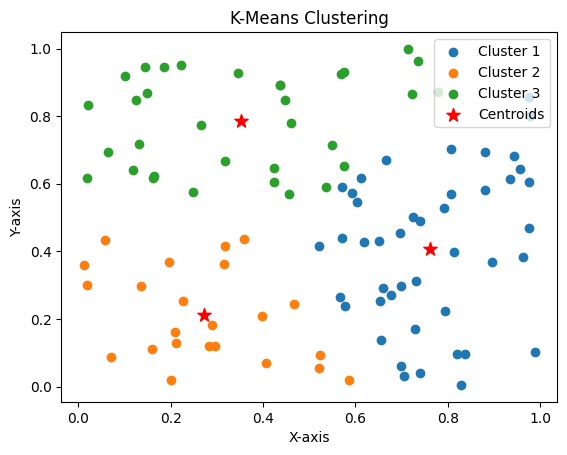

In [119]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data points with different colors for each cluster
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i + 1}')

# Plot the cluster centroids as red stars
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

## K-Means Sklearn

In [120]:
from sklearn.cluster import KMeans

# Specify the number of clusters (k)
k = 3

# Create a K-Means model
kmeans = KMeans(n_clusters=k, random_state=0, n_init=max_iterations)

# Fit the model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

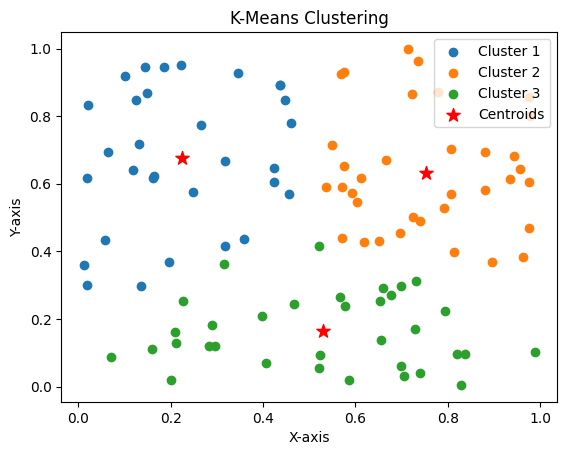

In [121]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a scatter plot of the data points with different colors for each cluster
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i + 1}')

# Plot the cluster centroids as red stars
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

## Elbow Curve

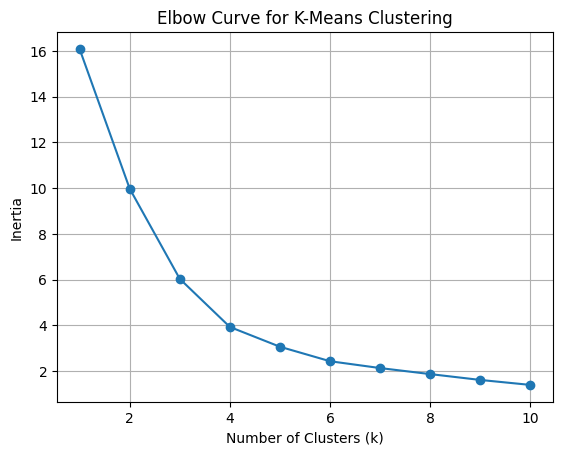

In [122]:
# Assuming you have a dataset named 'data'
# Initialize a list to store the inertia values for different k
inertia = []

# Define a range of k values to test
k_range = range(1, 11)

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=max_iterations)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid()
plt.show()

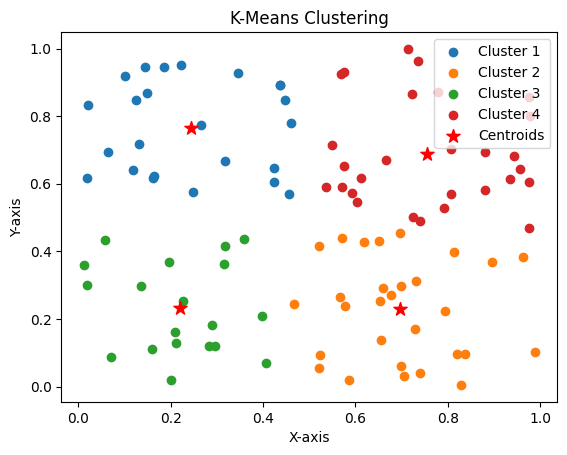

In [123]:
from sklearn.cluster import KMeans

# Specify the number of clusters (k)
k = 5

# Create a K-Means model
kmeans = KMeans(n_clusters=k, random_state=0, n_init=max_iterations)

# Fit the model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a scatter plot of the data points with different colors for each cluster
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i + 1}')

# Plot the cluster centroids as red stars
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

## Hierarchical clustering

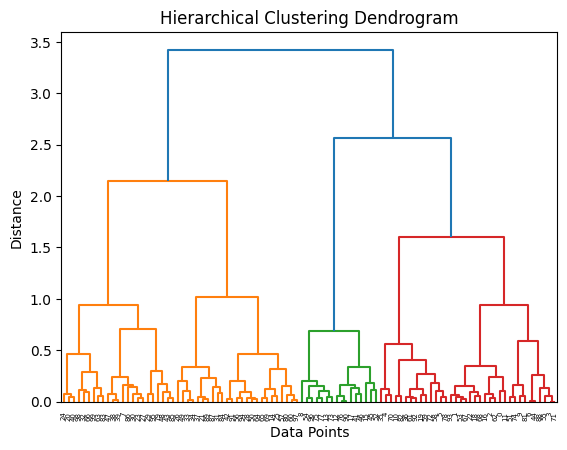

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Calculate the distance matrix
distance_matrix = pdist(data)

# Perform hierarchical clustering using the linkage function
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [125]:
# Specify a distance threshold to cut the dendrogram and obtain clusters
threshold = 2.5  # Adjust this threshold as needed

# Get cluster assignments using fcluster
labels = fcluster(linkage_matrix, t=threshold, criterion='distance')
labels

array([3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 2, 3, 2, 3, 3, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1,
       3, 2, 2, 1, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       3, 1, 2, 1, 3, 3, 1, 1, 2, 1, 1, 1], dtype=int32)

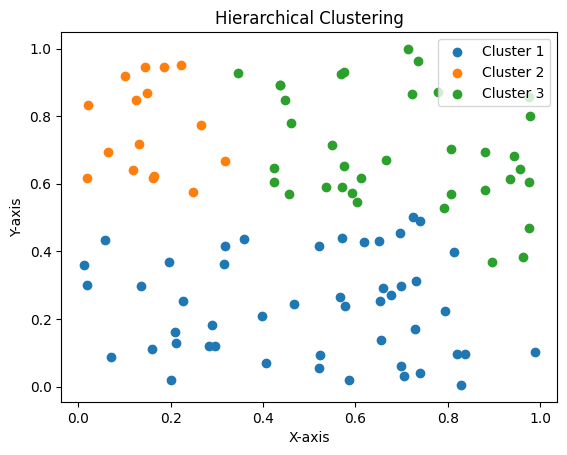

In [126]:
# Create a scatter plot of the data points with different colors for each cluster
for i in range(1, max(labels)+1):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i}')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hierarchical Clustering')
plt.legend()

# Show the plot
plt.show()

# Dimensionality reduction

## PCA (Manual)

In [127]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(data=X, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [128]:


# Step 1: Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select a subset of principal components (e.g., 2 components)
n_components = 6 # Choose the number of principal components
selected_components = eigenvectors[:, :n_components]

# Step 6: Project the data onto the selected eigenvectors
X_pca = np.dot(X_standardized, selected_components)


print(f"Original data:\n{data[:5]}\n")
print(f"PCA data:\n{X_pca[:5]}")

Original data:
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]

PCA data:
[[-3.31675081  1.44346263 -0.16573904  0.21563119  0.69304284  0.22388013]
 [-2.20946492 -0.33339289 -2.02645737  0.29135832 -0.25765463  0.92712024]
 [-2.51674015  1.0311513   0.98281867 -0.72490231 -0.25103312 -0.54927605]
 [-3.75706561  2.75637191 -0.17619184 -0.56798331 -0.31184159 -0.114431  ]
 [-1.00890849  0.86983082  2.02668822  0.40976579  0.2984575   0.4065196 ]]


In [145]:
from sklearn.linear_model import LogisticRegression

# Fit a linear regression model
model_pca = LogisticRegression(random_state = 0)
model_pca.fit(X_pca, y)

# Fit a linear regression model
model_regular = LogisticRegression(random_state = 0)
model_regular.fit(X, y)

print(model_pca.score(X_pca, y))
print(model_regular.score(X, y))

0.9943820224719101
0.9662921348314607


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## PCA (Sklearn)

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [150]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
sc = StandardScaler()

# Standardize the training data (X_train)
X_train = sc.fit_transform(X_train)
# Standardize the test data (X_test) using the mean and standard deviation from the training data
X_test = sc.transform(X_test)

In [151]:
from sklearn.decomposition import PCA

# Create an instance of the PCA class and specify the desired number of components (in this case, 2)
pca = PCA(n_components = 2)

# Fit and transform the training data (X_train) using PCA, reducing it to 2 principal components
X_train = pca.fit_transform(X_train)
# Transform the test data (X_test) using the same PCA transformation as the training data
X_test = pca.transform(X_test)

# Calculate the explained variance for the principal components
explained_variance = pca.explained_variance_ratio_
# The 'explained_variance' variable now contains the proportion of the total variance explained by each principal component.
explained_variance

array([0.36884109, 0.19318394])

In [152]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.9722222222222222


In [146]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
